# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Bike - sharing - dataset
- **Email:** giyansaputra883@gmail.com
- **ID Dicoding:** muhammad_giyan_saputra

## Menentukan Pertanyaan Bisnis

- Bagaimana 1 hari dalam seminggu mempengaruhi permintaan sepeda? Apakah lebih banyak penyewaan terjadi pada akhir pekan dibandingkan hari kerja?
- Pada jam berapa penyewaan sepeda paling banyak terjadi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_hour = pd.read_csv ("hour.csv")
csv_file_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_day = pd.read_csv ("day.csv")
csv_file_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dari data harian, dapat dianalisis apakah terdapat peningkatan atau penurunan jumlah penyewaan sepeda pada hari-hari tertentu. Misalnya, hari libur atau akhir pekan cenderung memiliki jumlah penyewaan yang lebih tinggi dibandingkan hari kerja.
- Data per jam memungkinkan mengidentifikasi pola penyewaan harian. Misalnya, penyewaan sepeda mungkin lebih tinggi selama jam sibuk (pagi dan sore hari) ketika orang berangkat dan pulang kerja, serta lebih rendah pada tengah malam.

### Assessing Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_hour = pd.read_csv ("hour.csv")
csv_file_hour.head()

csv_file_hour.info()
csv_file_hour.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_day = pd.read_csv ("day.csv")
csv_file_day.head()

csv_file_day.info()
csv_file_day.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Data harian menunjukkan bahwa tidak ada nilai yang hilang dalam kolom-kolom penting, yang memastikan analisis yang akurat terkait faktor-faktor yang mempengaruhi jumlah penyewaan sepeda per hari.
- Data penyewaan per jam mengindikasikan adanya variasi yang signifikan dalam jumlah penyewaan, dengan informasi mengenai jam sibuk dan tidak sibuk yang dapat digunakan untuk perencanaan dan pengelolaan sepeda

### Cleaning Data

In [6]:
csv_file_hour.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", csv_file_hour.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
csv_file_day.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", csv_file_day.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Proses penghapusan duplikasi pada data penyewaan sepeda per jam berhasil mengeliminasi semua data duplikat, sehingga memastikan bahwa analisis yang dilakukan menggunakan data yang unik dan representatif.
- Setelah penghapusan duplikasi, data harian menunjukkan statistik deskriptif yang baik, memungkinkan pemahaman yang lebih mendalam tentang penyewaan sepeda dan faktor-faktor yang mempengaruhi jumlah penyewaan setiap harinya.

## Exploratory Data Analysis (EDA)

### Explore ...

In [8]:
csv_file_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [9]:
csv_file_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**
- Data memiliki variasi yang signifikan dalam jumlah penyewaan sepeda per jam, dengan beberapa jam tertentu seperti jam sibuk di pagi dan sore memiliki tingkat penyewaan yang jauh lebih tinggi dibandingkan jam lainnya.
- Statistik deskriptif dari data harian menunjukkan bahwa faktor-faktor seperti hari kerja dan akhir pekan secara jelas mempengaruhi jumlah penyewaan sepeda, dengan peningkatan yang terlihat pada akhir pekan, yang menandakan bahwa orang lebih cenderung menggunakan sepeda untuk rekreasi atau kegiatan luar ruangan saat liburan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

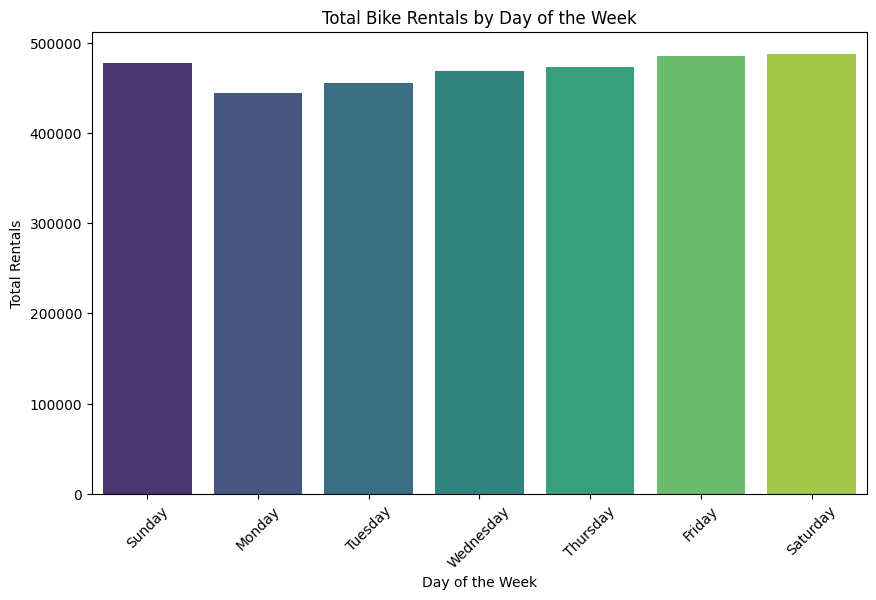

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_hour['weekday_name'] = csv_file_hour['weekday'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

plt.figure(figsize=(10, 6))
sns.barplot(data=csv_file_hour, x='weekday_name', y='cnt', estimator=sum, errorbar=None, palette='viridis', hue='weekday_name', dodge=False)
plt.title('Total Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()



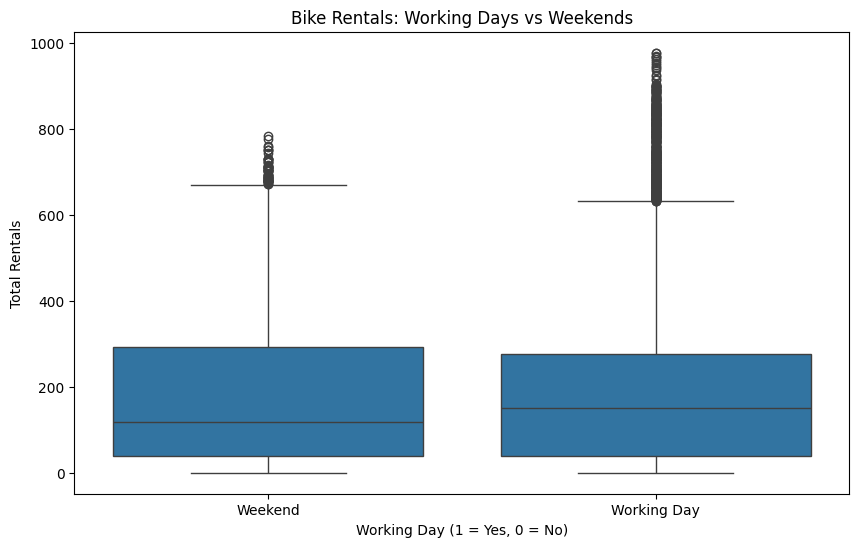

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(data=csv_file_hour, x='workingday', y='cnt')
plt.title('Bike Rentals: Working Days vs Weekends')
plt.xlabel('Working Day (1 = Yes, 0 = No)')
plt.ylabel('Total Rentals')
plt.xticks([0, 1], ['Weekend', 'Working Day'])
plt.show()


### Pertanyaan 2:

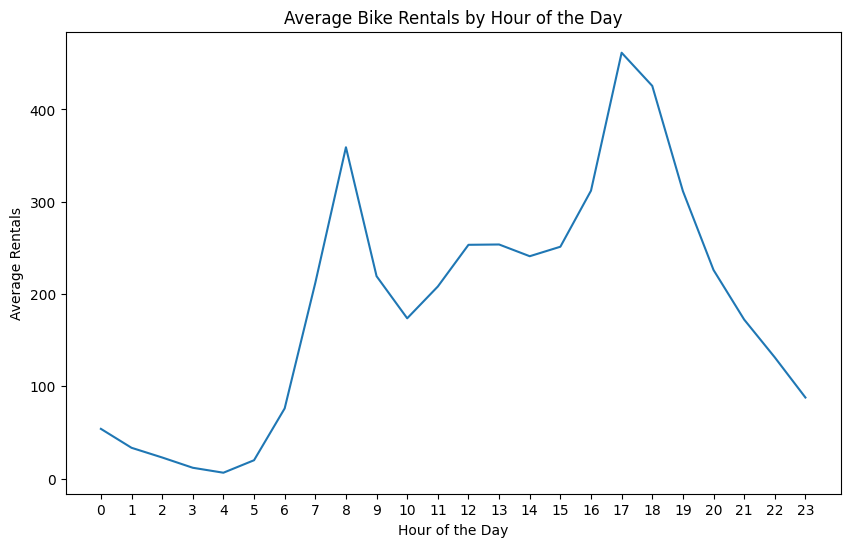

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(data=csv_file_hour, x='hr', y='cnt', estimator='mean', errorbar=None)
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.show()


**Insight:**
- Grafik batang menunjukkan bahwa penyewaan sepeda paling tinggi terjadi pada akhir pekan, dengan hari Sabtu dan Minggu mendominasi jumlah total penyewaan, yang menandakan bahwa pengguna lebih cenderung menggunakan sepeda untuk aktivitas rekreasi dan liburan dibandingkan dengan hari kerja.

Analisis menggunakan box plot mengungkapkan perbedaan yang signifikan antara jumlah penyewaan sepeda pada hari kerja dan akhir pekan, dengan jumlah penyewaan yang lebih tinggi pada akhir pekan menunjukkan bahwa waktu luang lebih mempengaruhi keputusan pengguna untuk menyewa sepeda.
- Grafik garis memperlihatkan pola penyewaan sepeda yang jelas berdasarkan waktu, dengan lonjakan penyewaan terjadi selama jam sibuk pagi dan sore, menandakan bahwa pengguna lebih cenderung menggunakan sepeda untuk perjalanan kerja atau aktivitas yang terkait dengan mobilitas harian.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan analisis data, terlihat bahwa penyewaan sepeda cenderung meningkat pada akhir pekan dibandingkan dengan hari kerja, dengan puncak penyewaan terjadi pada jam-jam tertentu, seperti sore hari.
-  analisis ini memberikan wawasan untuk meningkatkan layanan penyewaan sepeda dengan menyesuaikan penawaran dan promosi berdasarkan pola penggunaannya.